## Çok Değişkenli Aykırı Gözlem Analizi

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Local Outlier Factor

Gözlemleri bulundukları konumda **yoğunluk tabanlı skorlayarak** buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın lokal yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

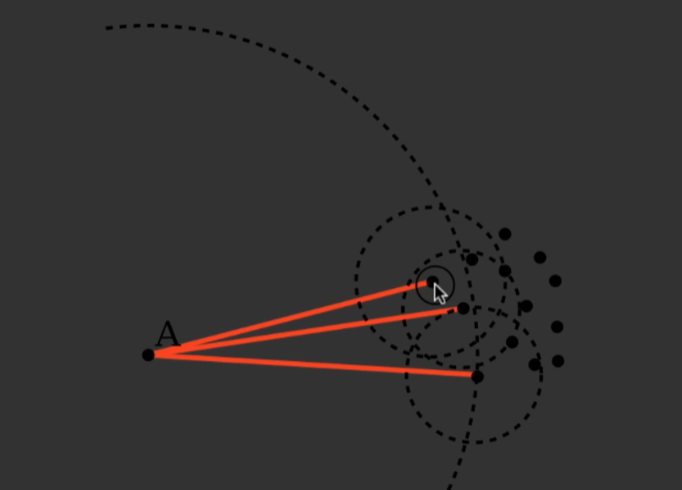

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include=["float64","int64"])
df = diamonds.copy()
df = df.dropna()

In [7]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [8]:
from sklearn.neighbors import LocalOutlierFactor

In [9]:
# Adım-1:
clf = LocalOutlierFactor(n_neighbors=20 , contamination=0.1)

In [10]:
# contamination = kirlenme,atık gibi anlamlara gelir Burada ise veri içerisindeki aykırı değer oranını temsil eder.
# 0.1 ile verinin %10’unun aykırı değer olduğu varsayıldı.

In [11]:
# n_neighbors=20 ile her noktanın 20 komşusuna bakılacağı belirtildi.

In [12]:
# Adım-2:
# fit_predict : Uygun tahminleme işlemi

clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [13]:
# Adım-3:
df_scores = clf.negative_outlier_factor_

#### df_scores = clf.negative_outlier_factor_

Her gözlem için aykırılık (outlier) skorlarını içeren bir dizi (array) oluşturur.


#### "negative_outlier_factor_" ne yapar?

LocalOutlierFactor modeli her veri noktasına bir yerel yoğunluk skoru hesaplar.
Bu skor, "negative outlier factor" (NOF) olarak adlandırılır.
Daha küçük (daha negatif) değerler, daha güçlü aykırı değerlerdir.

#### Detaylı Açıklama
negative_outlier_factor_ değeri, her gözlemin komşularına kıyasla yoğunluğunu ölçer.**Ancak, sklearn'de bu değer NEGATİF olarak saklanır!**

Bu yüzden negative_outlier_factor_ çıktılarını yorumlarken:

**Daha küçük değerler (örn. -8, -5) → Aykırı değer (outlier).**

**Daha büyük değerler (örn. -1.2, -1.5) → Normal veri.**

#### Örnek:

df_scores = clf.negative_outlier_factor_

print(df_scores[:10])

Örnek çıktı:
array([-1.58, -1.59, -1.62, -1.33, -1.30, -1.28, -1.28, -1.26, -1.28, -1.27])

Bu durumda, en küçük (en negatif) değerler aykırı olma ihtimali yüksek olan gözlemlerdir.

#### Özetle:

clf.negative_outlier_factor_, her gözlem için aykırılık skoru verir.Küçük (negatif) değerler aykırı, büyük değerlere yakın olanlar normaldir.Eşik değerbelirleyerek aykırı olanları filtreleyebiliriz.

Bu yüzden, df_scores kullanılarak aykırı değerler belirlenir ve gerektiğinde temizlenir.

In [15]:
np.sort(df_scores)[:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [16]:
esik_deger = np.sort(df_scores)[10]

In [17]:
aykiri_tf = df_scores < esik_deger

In [104]:
df[aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09


In [19]:
aykiri_tf

array([False, False, False, ..., False, False, False])

### Silme Yöntemi

In [20]:
clean_df = df[df_scores > esik_deger]

In [21]:
clean_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


### Baskılama

In [100]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
45688,0.7,71.6,55.0,1696,5.47,5.28,3.85


In [112]:
baski_deger = df[df_scores == esik_deger]

In [108]:
aykirilar = df[aykiri_tf]

In [110]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09


### to_records()

to_records() fonksiyonu, pandas kütüphanesindeki bir **DataFrame nesnesini NumPy kayıtlı dizisine (structured array) dönüştürmek için** kullanılır.

**index=True:** Varsayılan olarak DataFrame'in indeks sütununu da dahil eder. False olarak ayarlanırsa indeks eklenmez.

In [123]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09


In [128]:
rec_aykirilar = aykirilar.to_records(index=False)

In [134]:
rec_aykirilar[:] = baski_deger.to_records(index=False)

In [136]:
rec_aykirilar

rec.array([(0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85),
           (0.7, 71.6, 55., 1696, 5.47, 5.28, 3.85)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [142]:
df[aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09


In [147]:
df[aykiri_tf] = pd.DataFrame(data= rec_aykirilar, index =df[aykiri_tf].index)

In [149]:
df[aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.7,71.6,55.0,1696,5.47,5.28,3.85
10377,0.7,71.6,55.0,1696,5.47,5.28,3.85
24067,0.7,71.6,55.0,1696,5.47,5.28,3.85
35633,0.7,71.6,55.0,1696,5.47,5.28,3.85
41918,0.7,71.6,55.0,1696,5.47,5.28,3.85
48410,0.7,71.6,55.0,1696,5.47,5.28,3.85
49189,0.7,71.6,55.0,1696,5.47,5.28,3.85
50773,0.7,71.6,55.0,1696,5.47,5.28,3.85
52860,0.7,71.6,55.0,1696,5.47,5.28,3.85
52861,0.7,71.6,55.0,1696,5.47,5.28,3.85


### Eksik Veri Analizi

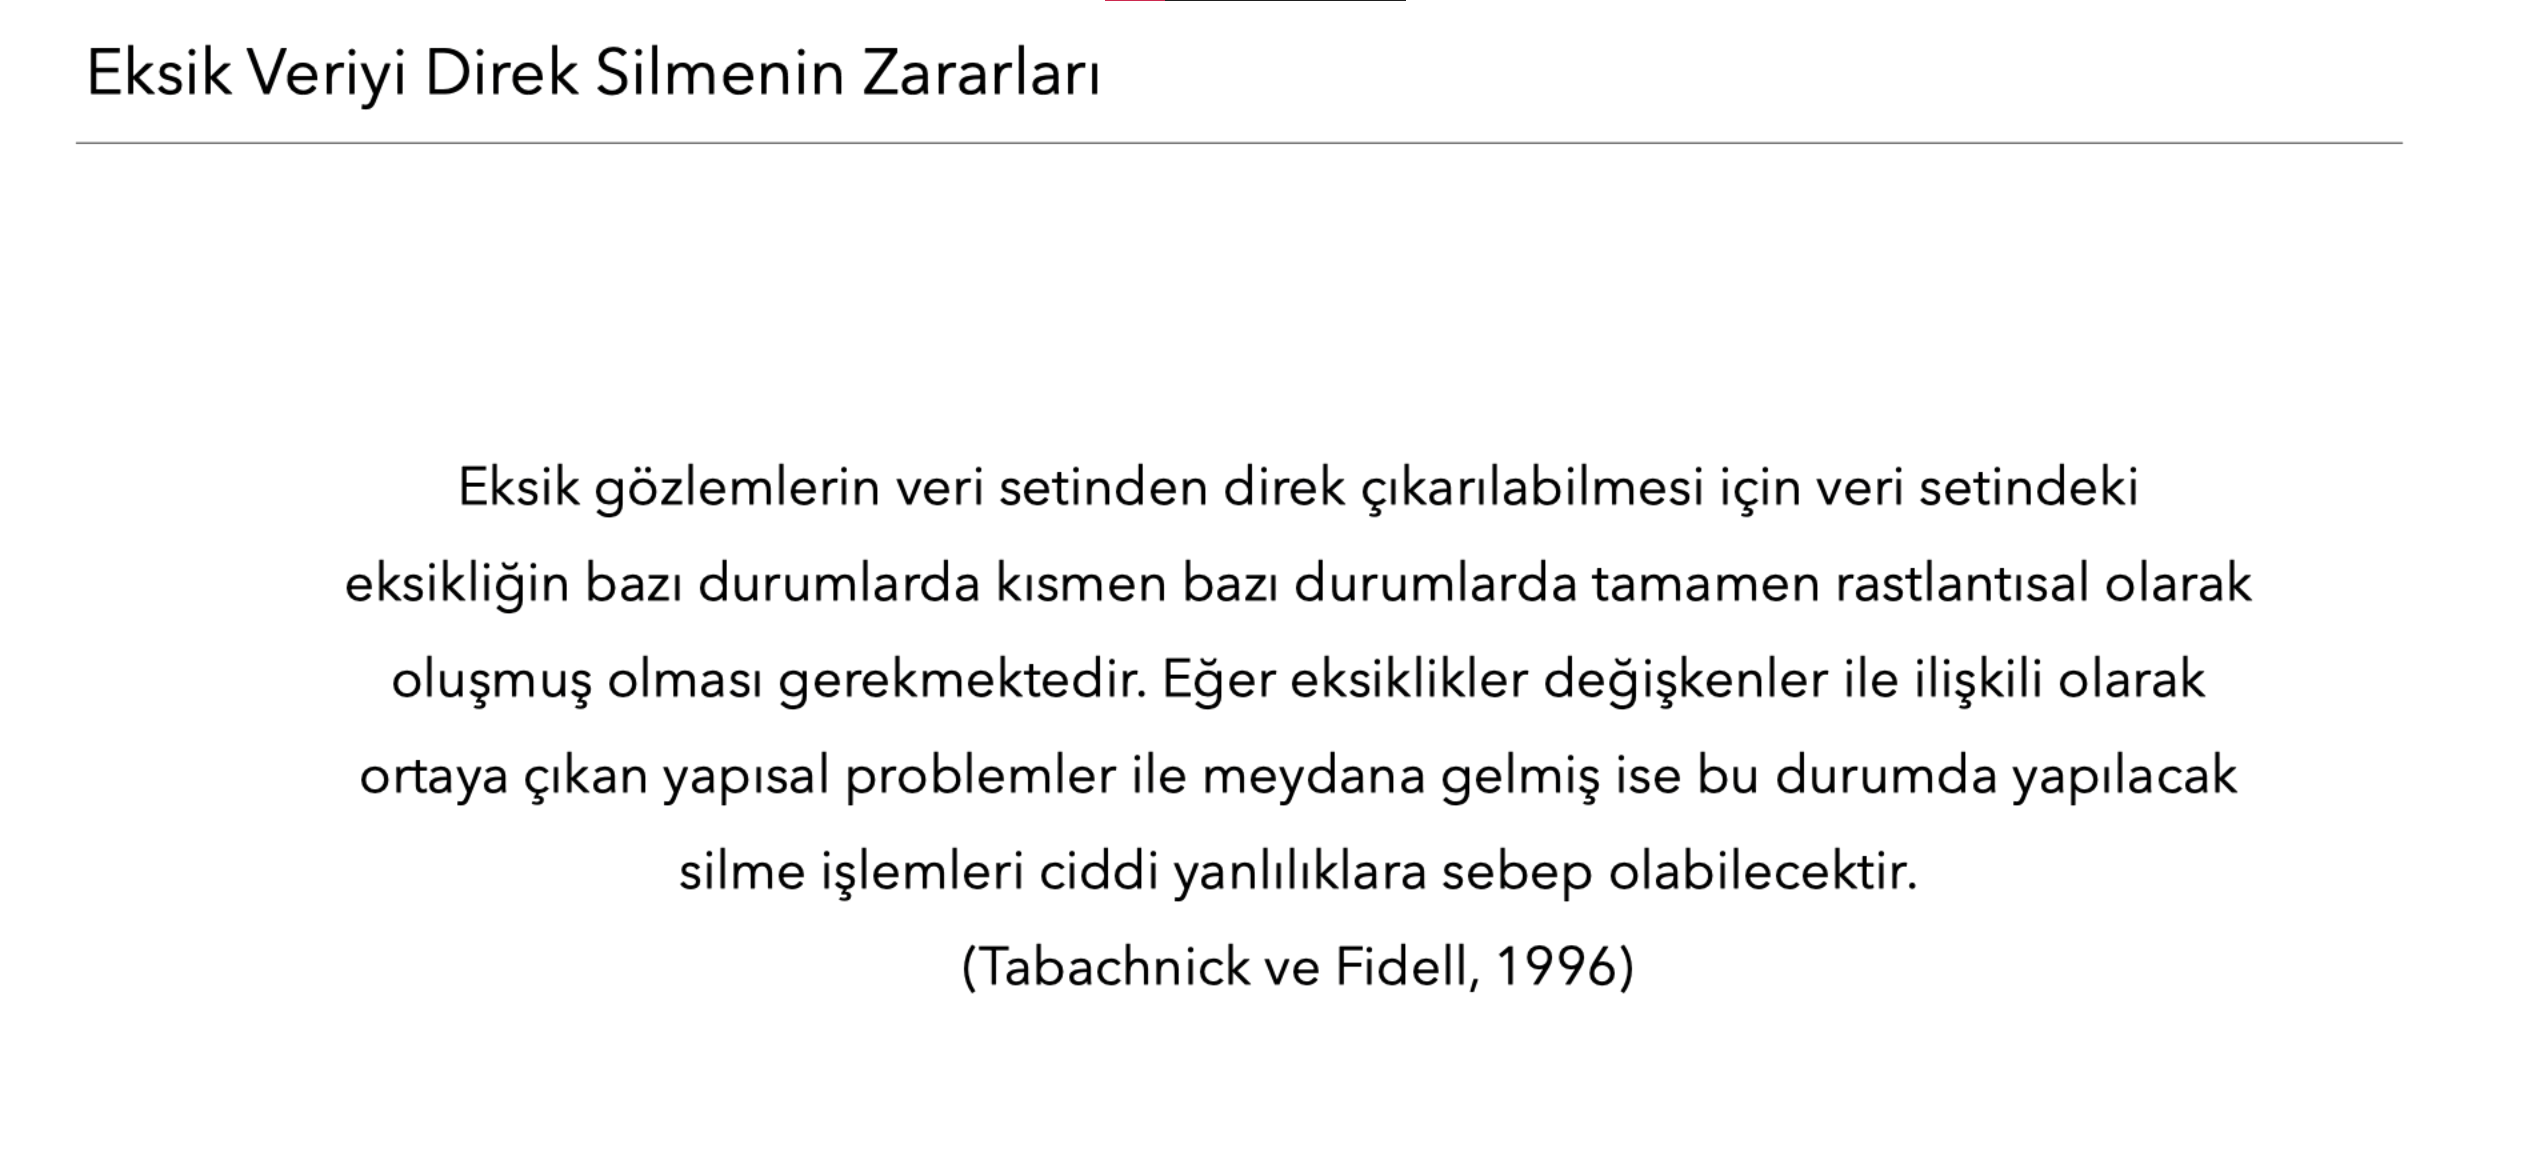

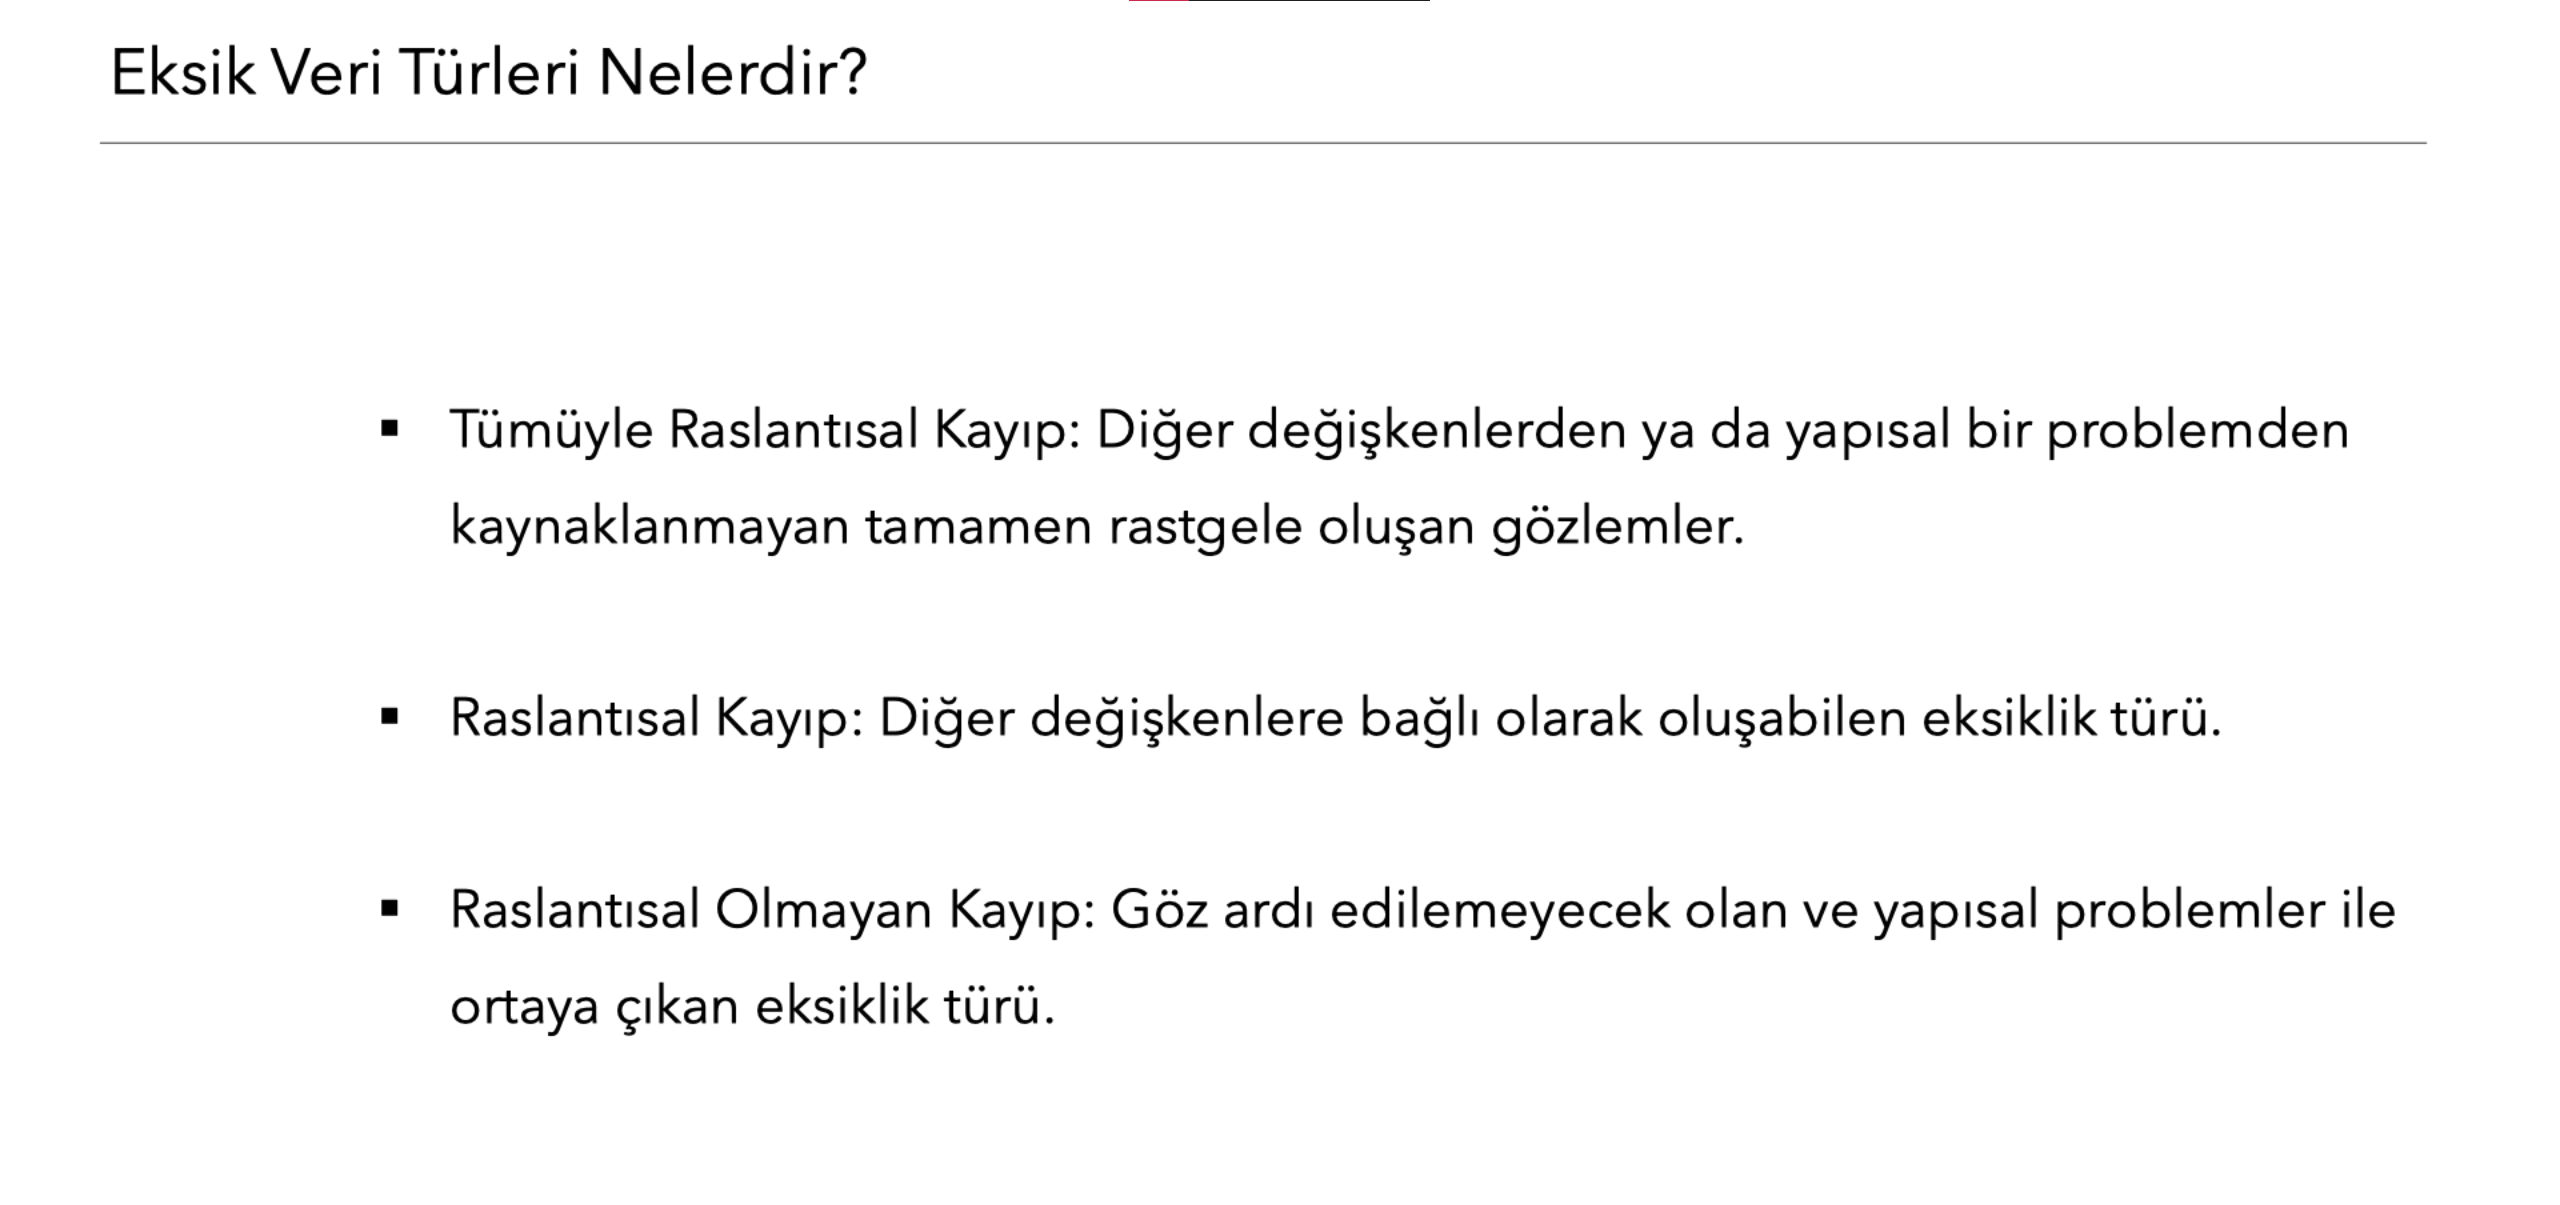

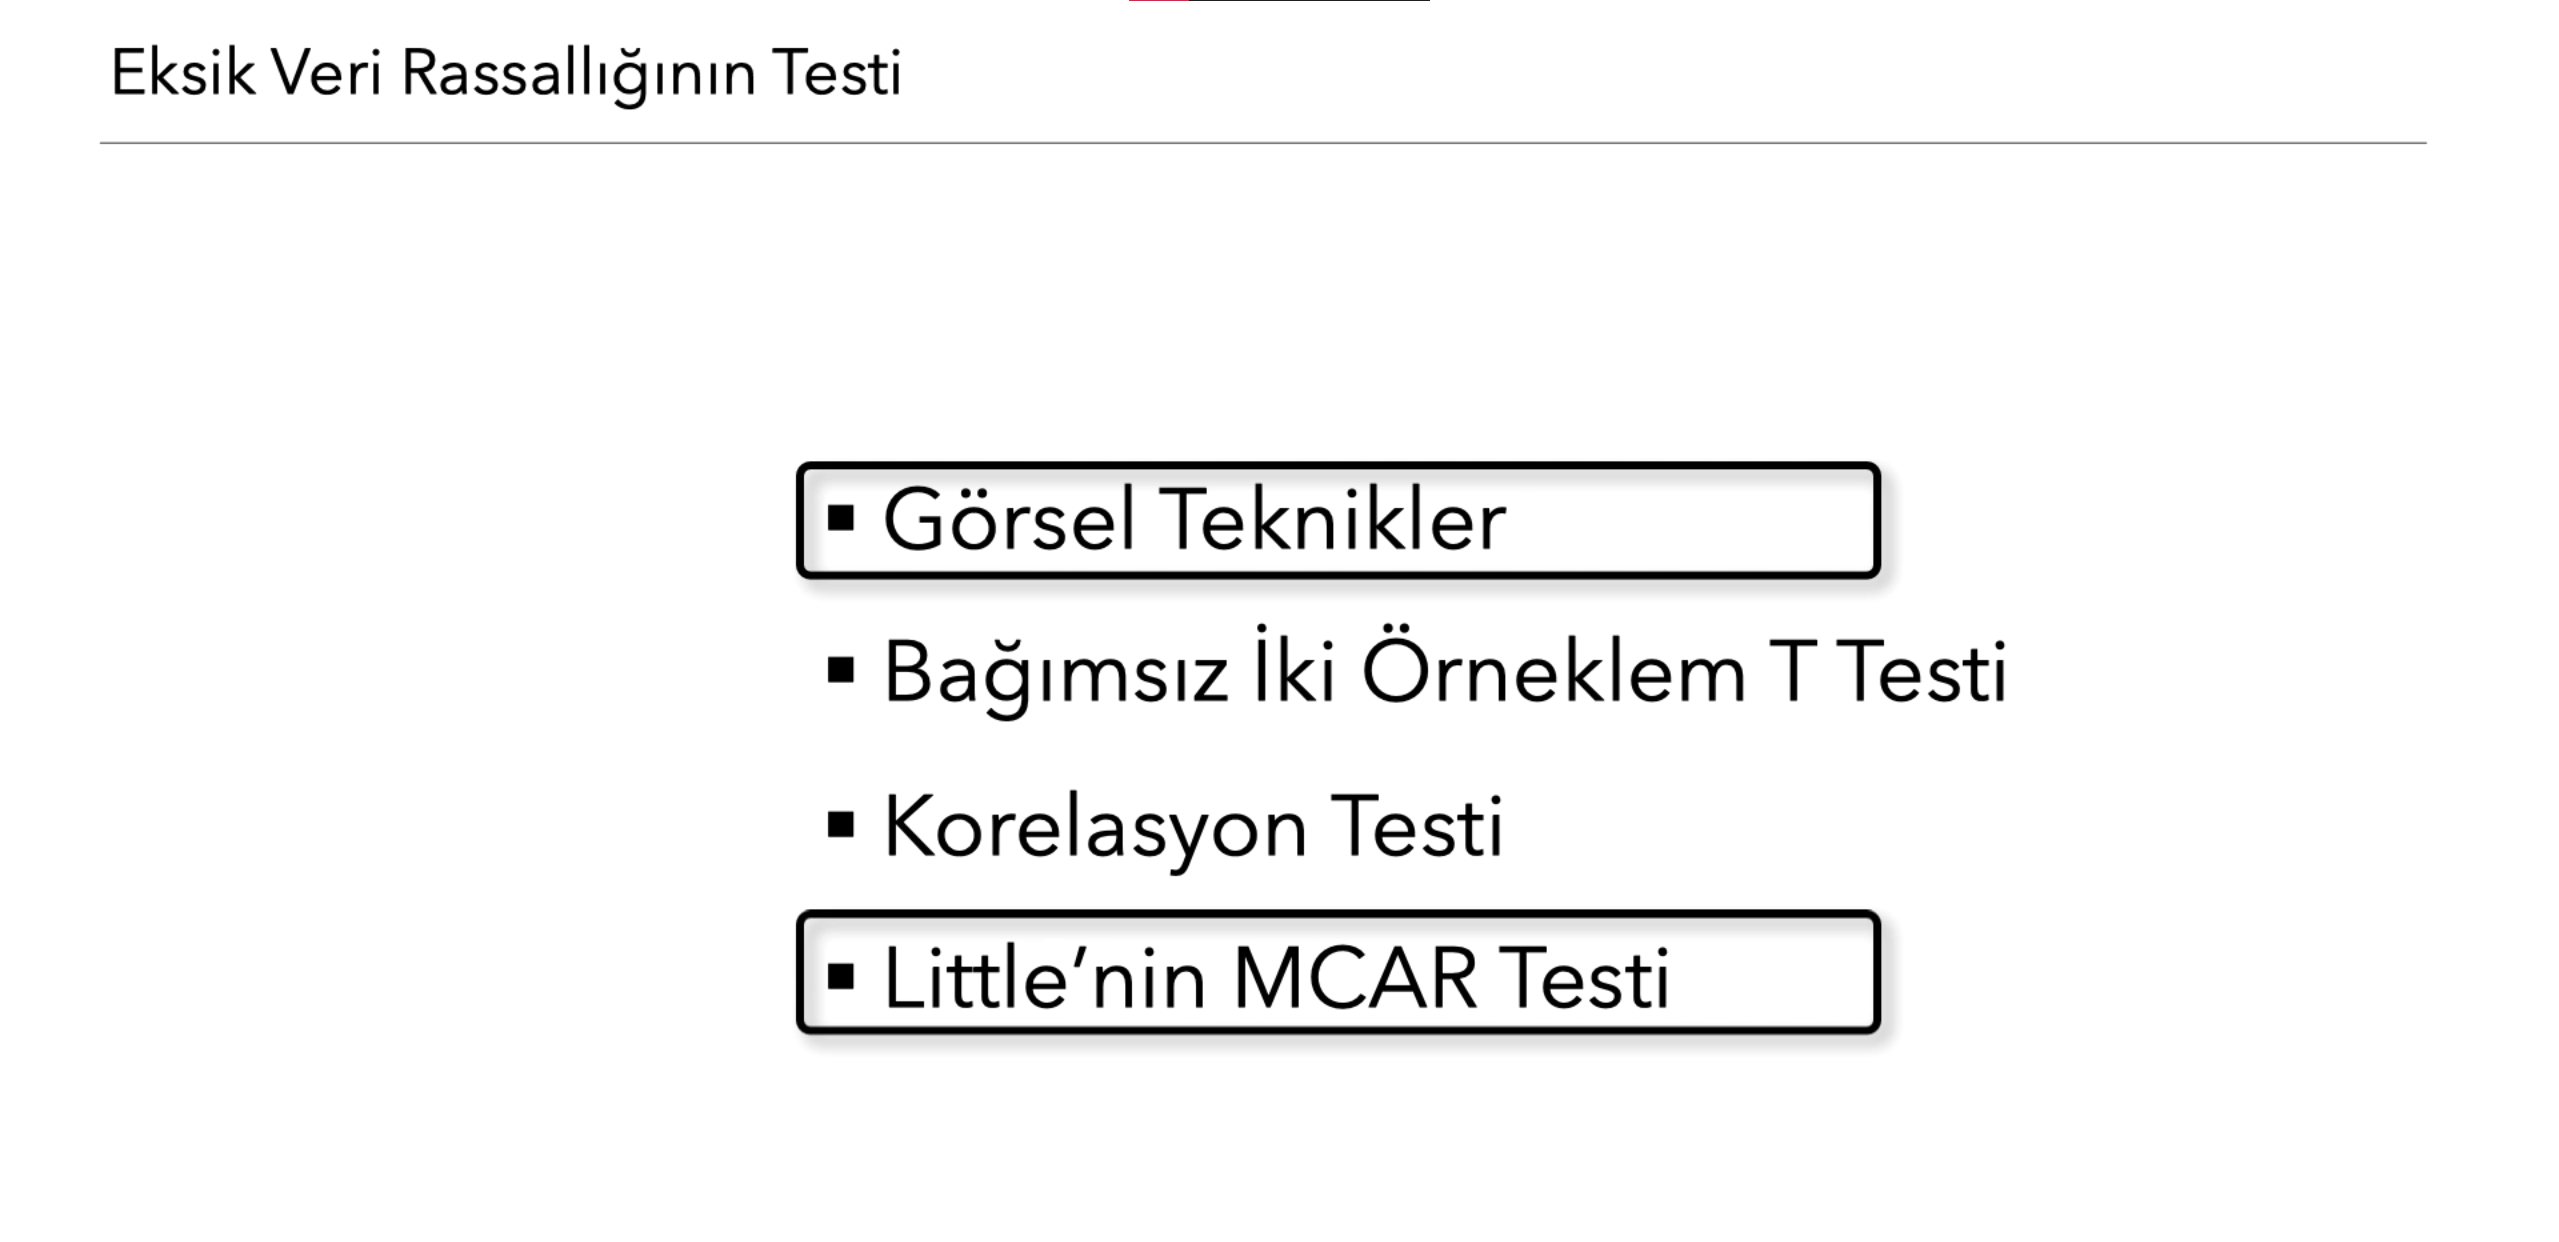

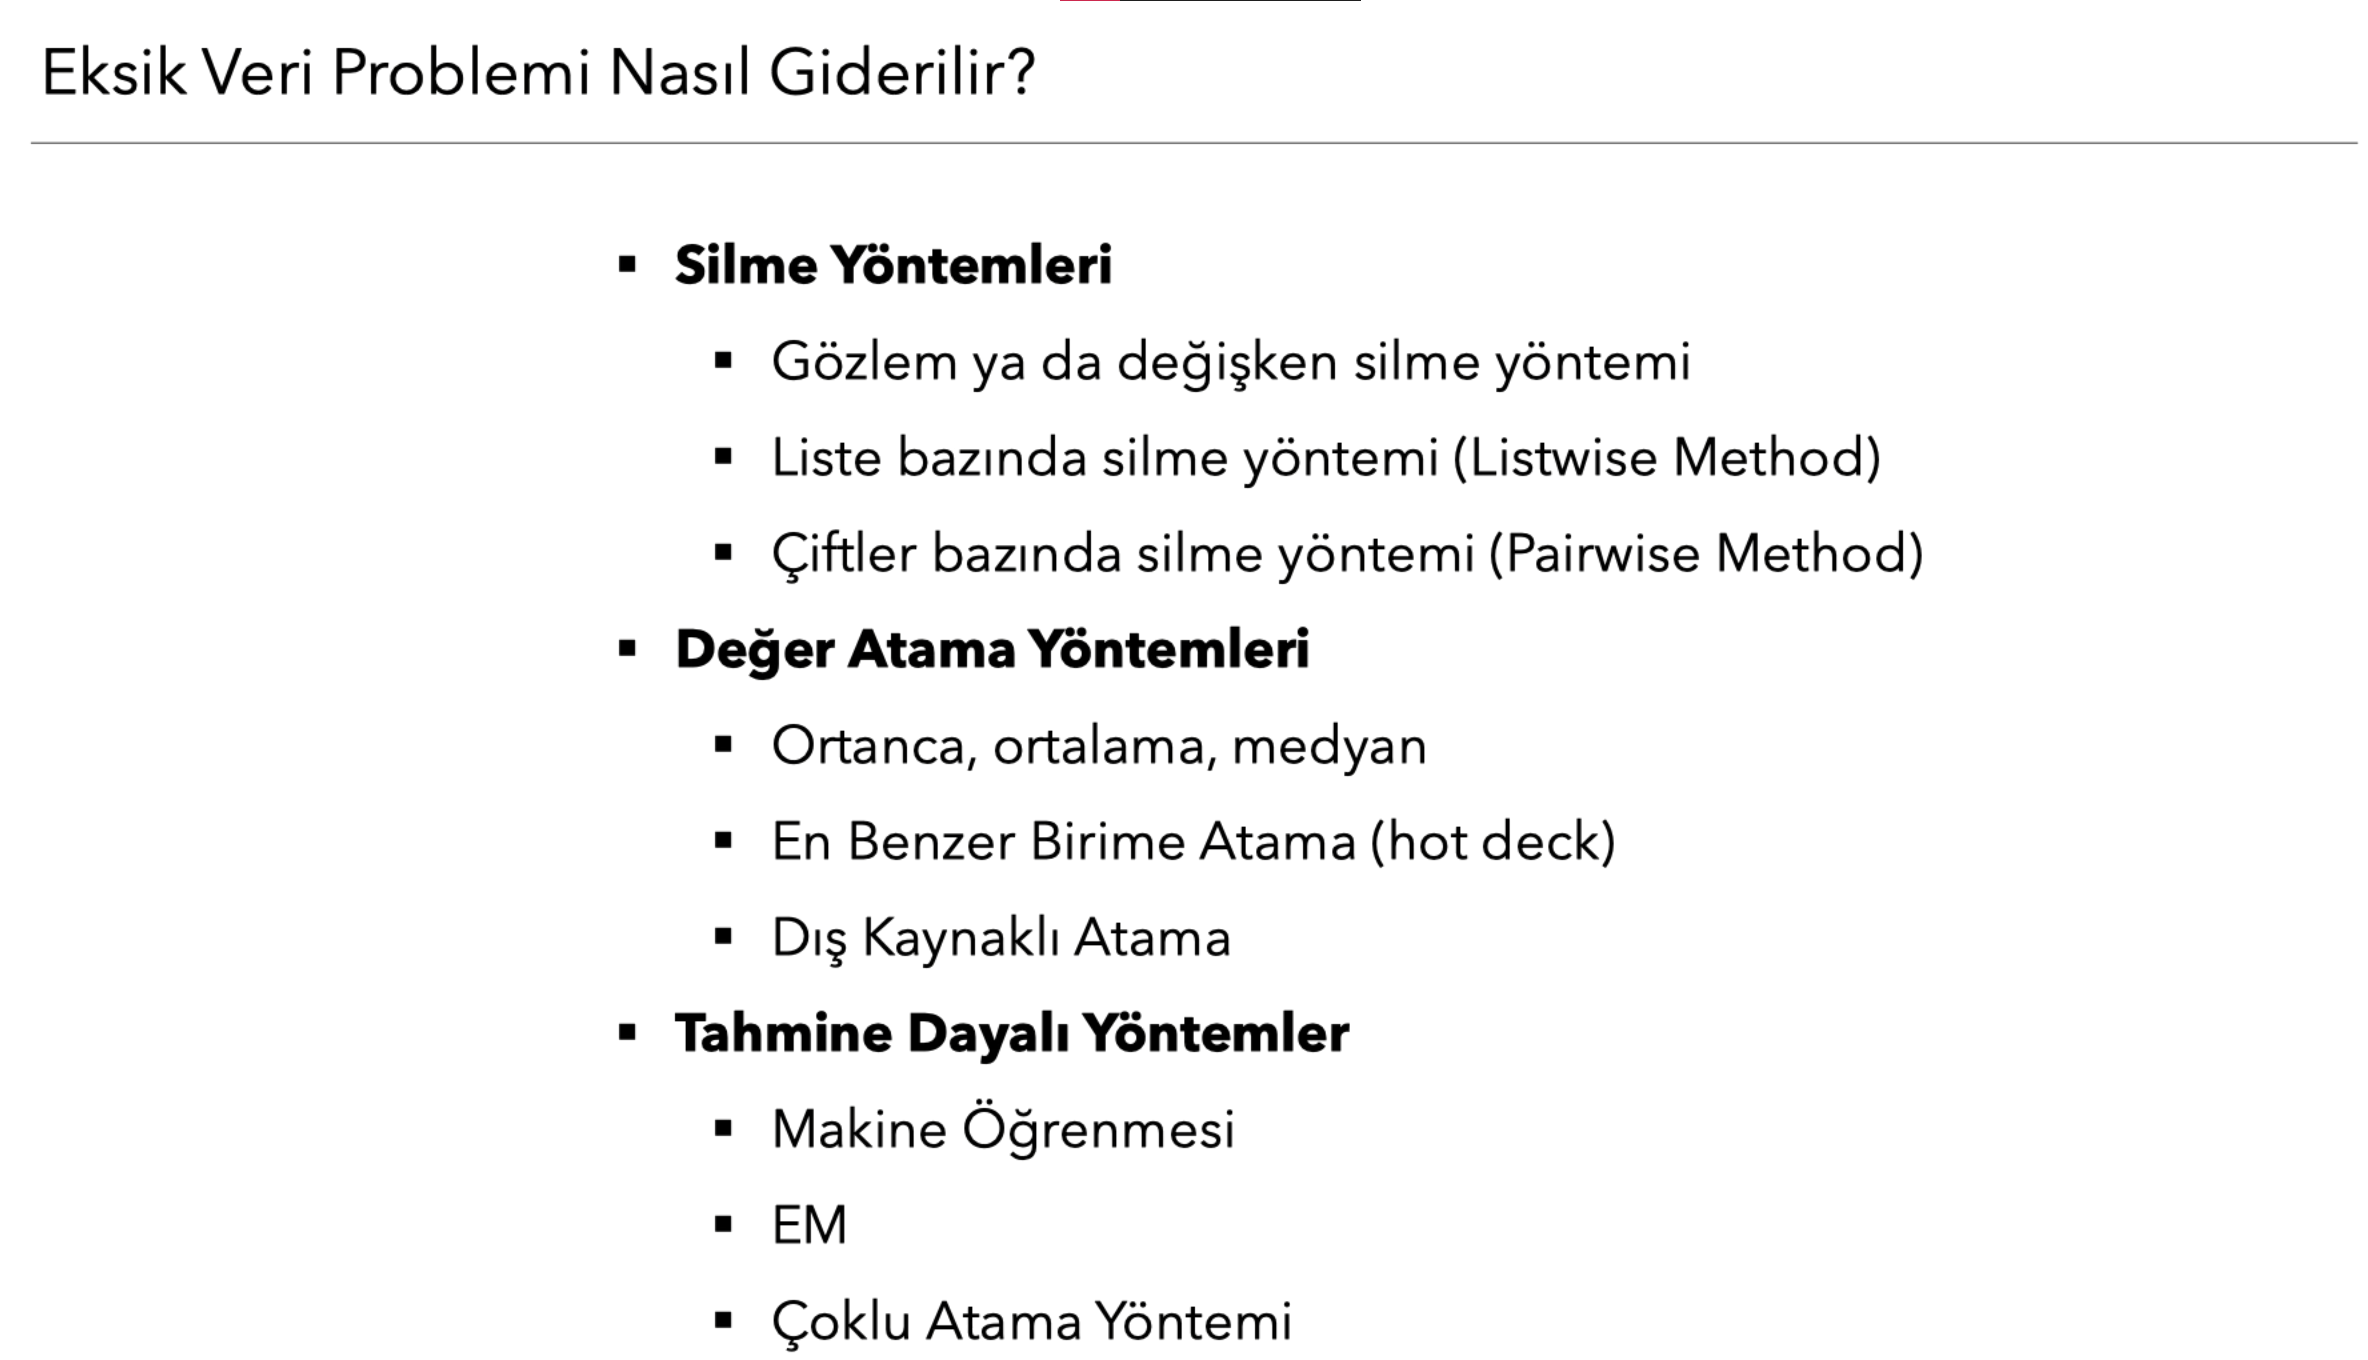

In [166]:
C1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
C2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
C3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"C1" : C1,
         "C2" : C2,
         "C3" : C3}        
)

df

,C1,C2,C3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Eksik Değerlerin Saptanması

In [170]:
df.isnull().sum() # Değişkenler içerisinde yer alan eksik değerlerin sayısını göstermiş olduk.

C1    2
C2    3
C3    2
dtype: int64

In [172]:
df.isnull().sum().sum() # Değişkenler içerisinde yer alan eksik değerlerin toplamını göstermiş olduk.

7

In [188]:
df[df.isnull().any(axis = 1)] # DF içerisinde en az bir eksik değere sahip olan değişkenleri göstermiş olduk.

,C1,C2,C3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [195]:
df.notnull().sum() # DF içerisinde yer alan değişkenler üzerinde, eksik olmayan değerlerin sayısını göstermiş olduk.

C1    7
C2    6
C3    7
dtype: int64

In [199]:
df[df.notnull().all(axis = 1)] # DF içerisinde yer alan değişkenler üzerinde, tüm değerleri dolu olanları (hiç eksik değer yok) göstermiş olduk.

,C1,C2,C3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik Değerlerin Silinmesi İşlemi

In [207]:
df.dropna()

,C1,C2,C3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [211]:
df

,C1,C2,C3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [213]:
# df.dropna(inplace=True) ile df üzerinde yapılan eksik değerlerin silinmesi işlemi kalıcı hale gelmiş olur.

### Eksik Değerlerin Yerine Basit Değer Atama İşlemi

In [221]:
df.C1.fillna(df.C1.mean()) # C1 sütununda yer alan eksik değerleri C1 sütununun ortalama değeri ile doldurmuş olduk.

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: C1, dtype: float64

In [235]:
df.apply(lambda x:x.fillna(x.mean()).round(1),axis=0)

,C1,C2,C3
0,1.0,7.0,11.0
1,3.0,6.2,12.0
2,6.0,5.0,5.0
3,6.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,6.2,7.0
6,6.0,6.2,11.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0
